In [1]:
%matplotlib inline
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


# toi 2285

Target: TOI 2285
Available sectors: [16 17 24]
Using sector=16.
Searching lightcurvefile for TIC 329148988 (sector 16).
Found 1 lightcurve(s).
Using TESS short cadence.



<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

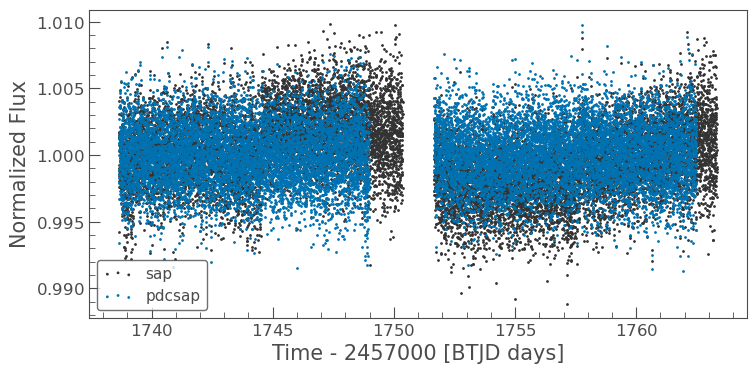

In [2]:
s = cr.ShortCadence(toiid=2285)

#get sap and pdcsap lcs of first available sector
sap = s.get_lc(lctype='sap')
pdcsap = s.get_lc(lctype='pdcsap')

ax = sap.scatter(label='sap')
pdcsap.scatter(label='pdcsap', ax=ax)

Searching lightcurvefile for TIC 329148988 (sector 17).
Found 1 lightcurve(s).
Searching lightcurvefile for TIC 329148988 (sector 24).
Found 1 lightcurve(s).


Text(0.5, 1.0, 'sectors [16 17 24]')

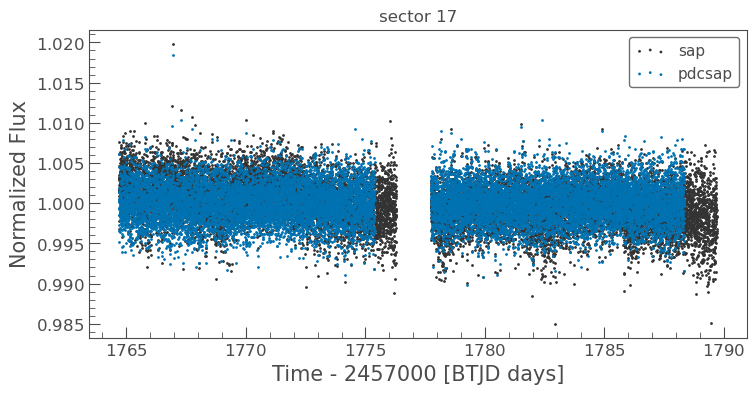

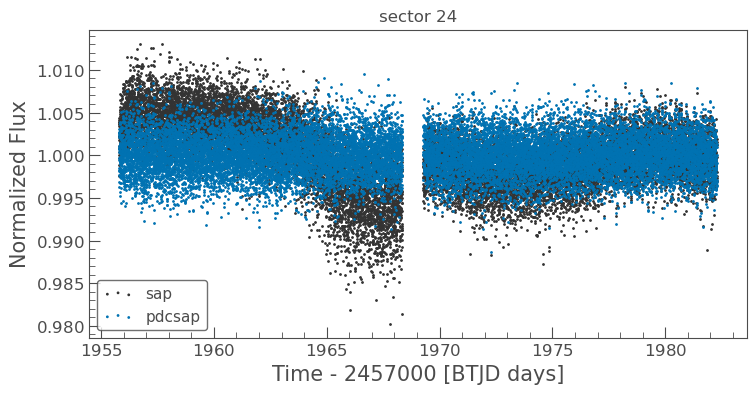

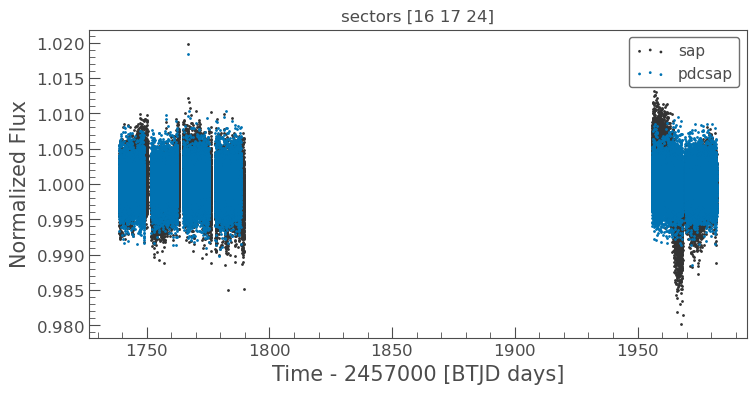

In [3]:
#append lcs in other sectors
for sector in [17,24]:
    lc1 = s.get_lc(lctype='sap', sector=sector)
    lc2 = s.get_lc(lctype='pdcsap', sector=sector)
    
    sap = sap.append(lc1)
    pdcsap = pdcsap.append(lc2)
    
    ax = lc1.scatter(label='sap')
    lc2.scatter(label='pdcsap', ax=ax)
    ax.set_title(f"sector {sector}")
    
#plot concatenated lcs
ax = sap.scatter(label='sap')
pdcsap.scatter(label='pdcsap', ax=ax)
ax.set_title(f"sectors {s.all_sectors}")

## Using vanilla Lomb-Scargle on SAP lc

In [4]:
lc = sap.copy()

#get transit mask using TOI ephemeris
transit_mask = cr.get_transit_mask(lc,
                                   period=s.toi_period,
                                   epoch=s.toi_epoch,
                                   duration_hours=s.toi_duration
                                  )

Using Lomb-Scargle method
P=25.26+/-5.20 d


Text(0.5, 0.98, 'TOI 2285 (sectors [16 17 24])')

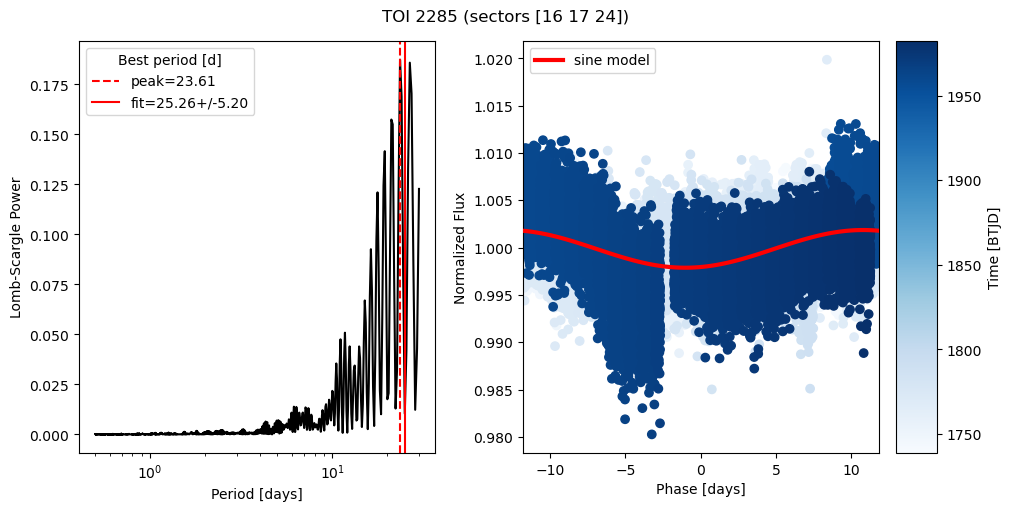

In [5]:
#mask transit
masked_lc = lc[~transit_mask]
fig = cr.plot_rotation_period(masked_lc.time, masked_lc.flux
                          )
fig.suptitle(f"TOI {s.toiid} (sectors {s.all_sectors})")

## Using Generalized Lomb-Scargle

In [6]:
data = [masked_lc.time, 
        masked_lc.flux, 
        masked_lc.flux_err]
gls = cr.Gls(data)

In [7]:
gls.best

{'f': 0.042278445691504976,
 'P': 23.65271437121281,
 'amp': 0.0020066262160708345,
 'ph': -0.03672402256971943,
 'T0': 1739.5236248013512,
 'offset': 0.9998597878277465,
 'e_amp': 1.8471950352759927e-05,
 'e_ph': 0.0014650970786908343,
 'e_T0': 0.0346535227283726,
 'e_offset': 1.3061641356177782e-05,
 'e_f': 2.183857836138042e-05,
 'e_P': 0.012217612256234592}

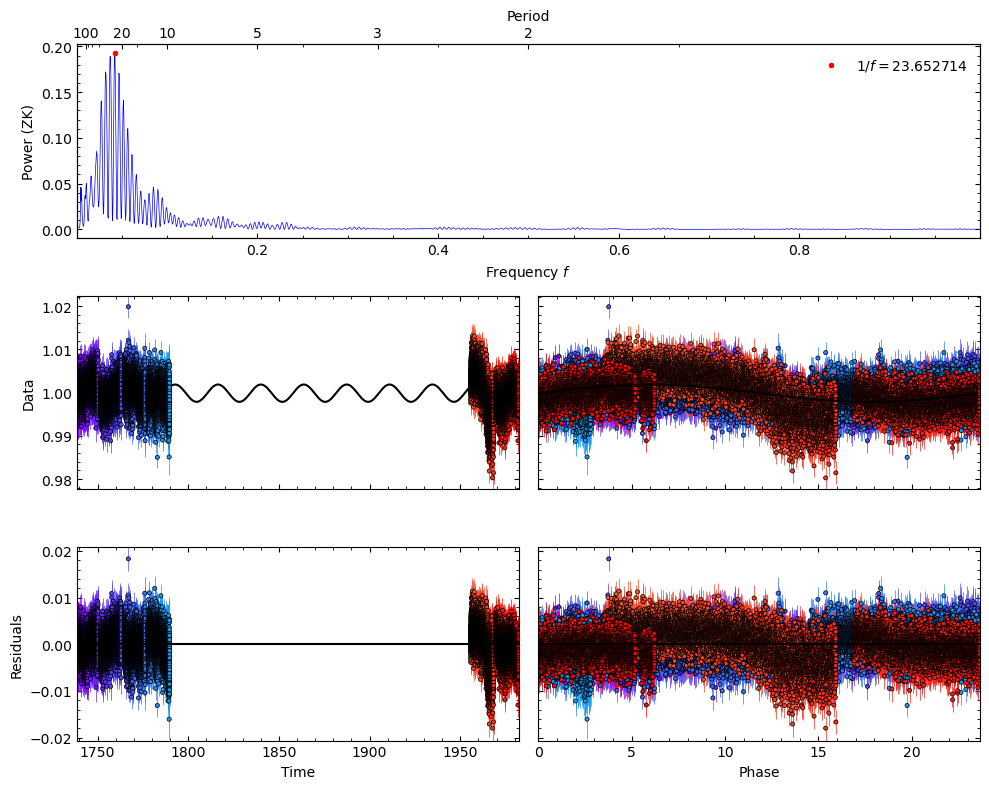

In [8]:
fig = gls.plot()

# TOI 1749

Target: TOI 1749
Available sectors: [14 15 16 17 18 19 20 21 22 22 23 24 25 26]
Using sector=14.
Searching lightcurvefile for TIC 233602827 (sector 14).
Found 1 lightcurve(s).
Using TESS short cadence.



<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

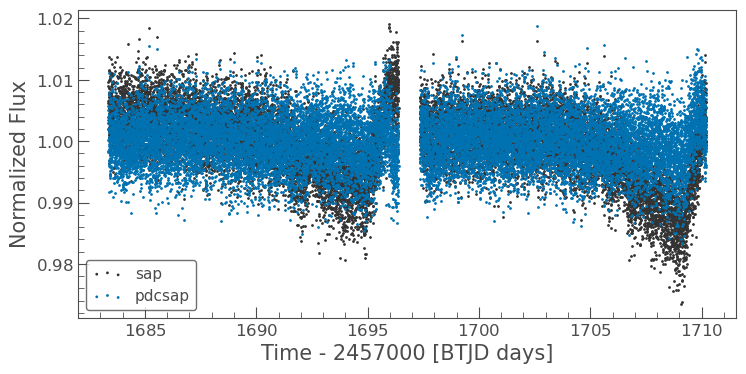

In [9]:
s = cr.ShortCadence(toiid=1749)

sap = s.get_lc(lctype='sap')
pdcsap = s.get_lc(lctype='pdcsap')

ax = sap.scatter(label='sap')
pdcsap.scatter(label='pdcsap', ax=ax)

Searching lightcurvefile for TIC 233602827 (sector 19).
Found 1 lightcurve(s).
Searching lightcurvefile for TIC 233602827 (sector 20).
Found 1 lightcurve(s).
Searching lightcurvefile for TIC 233602827 (sector 24).
Found 1 lightcurve(s).
Searching lightcurvefile for TIC 233602827 (sector 25).
Found 1 lightcurve(s).


Text(0.5, 1.0, 'sectors [19, 20, 24, 25]')

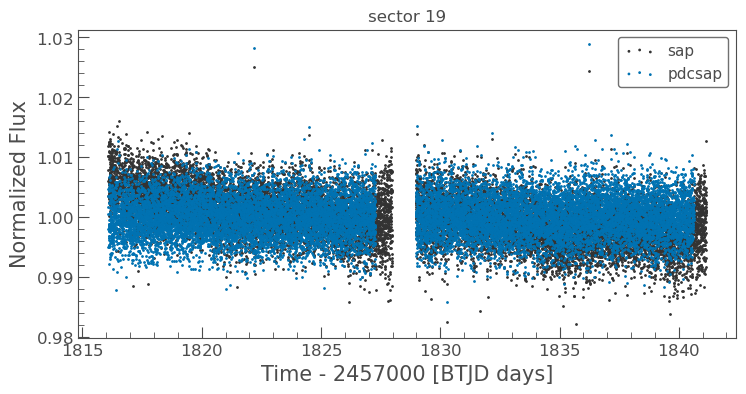

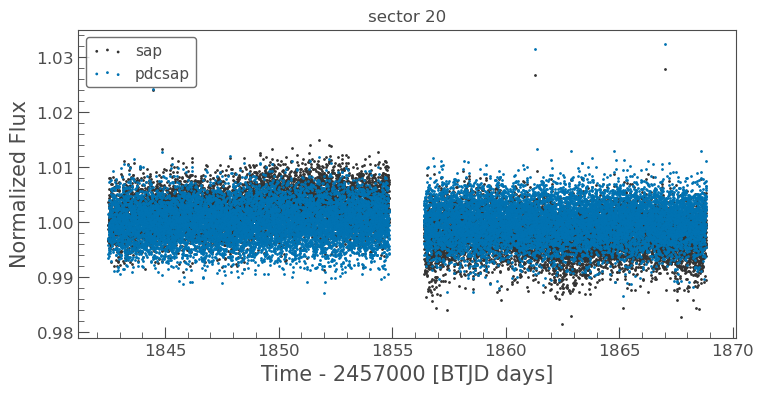

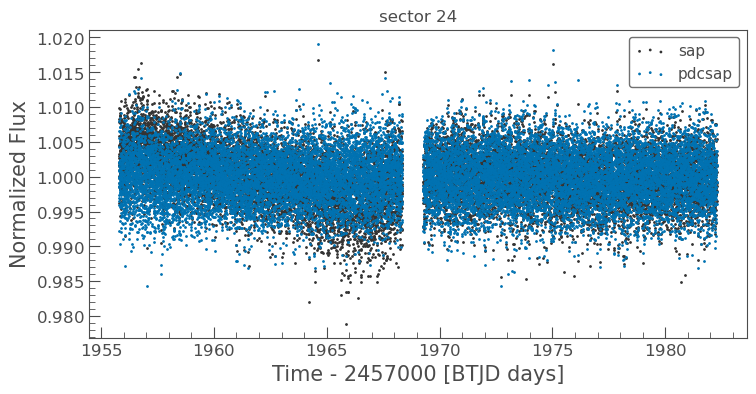

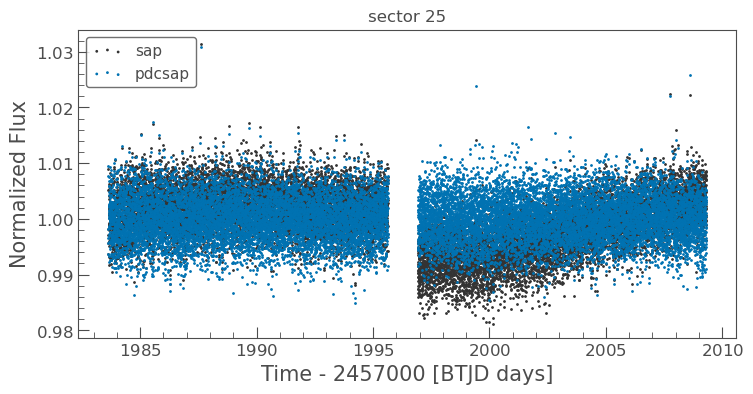

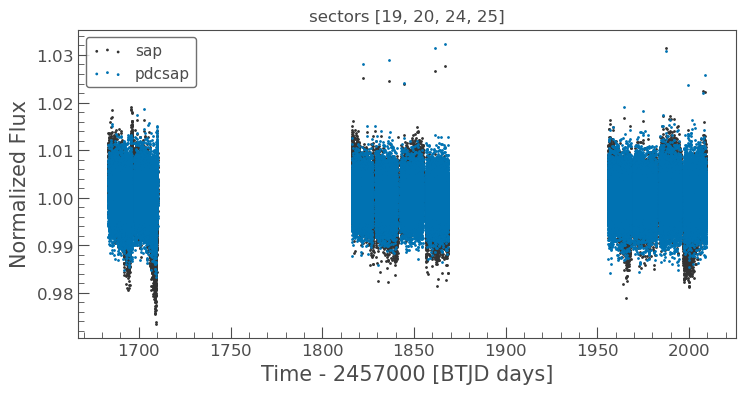

In [10]:
#append lcs in other sectors
selected_sectors = [19,20,24,25]
for sector in selected_sectors:
    lc1 = s.get_lc(lctype='sap', sector=sector)
    lc2 = s.get_lc(lctype='pdcsap', sector=sector)
    
    sap = sap.append(lc1)
    pdcsap = pdcsap.append(lc2)
    
    ax = lc1.scatter(label='sap')
    lc2.scatter(label='pdcsap', ax=ax)
    ax.set_title(f"sector {sector}")
    
#plot concatenated lcs
ax = sap.scatter(label='sap')
pdcsap.scatter(label='pdcsap', ax=ax)
ax.set_title(f"sectors {selected_sectors}")

## stellar rotation

Using period=4.4890 d, epoch=1685.94 BTJD, duration=1.87 hr.
Using biweight filter with window_length=11.00 day.


Text(0.5, 1.0, 'TOI 1749 (sectors [19, 20, 24, 25])')

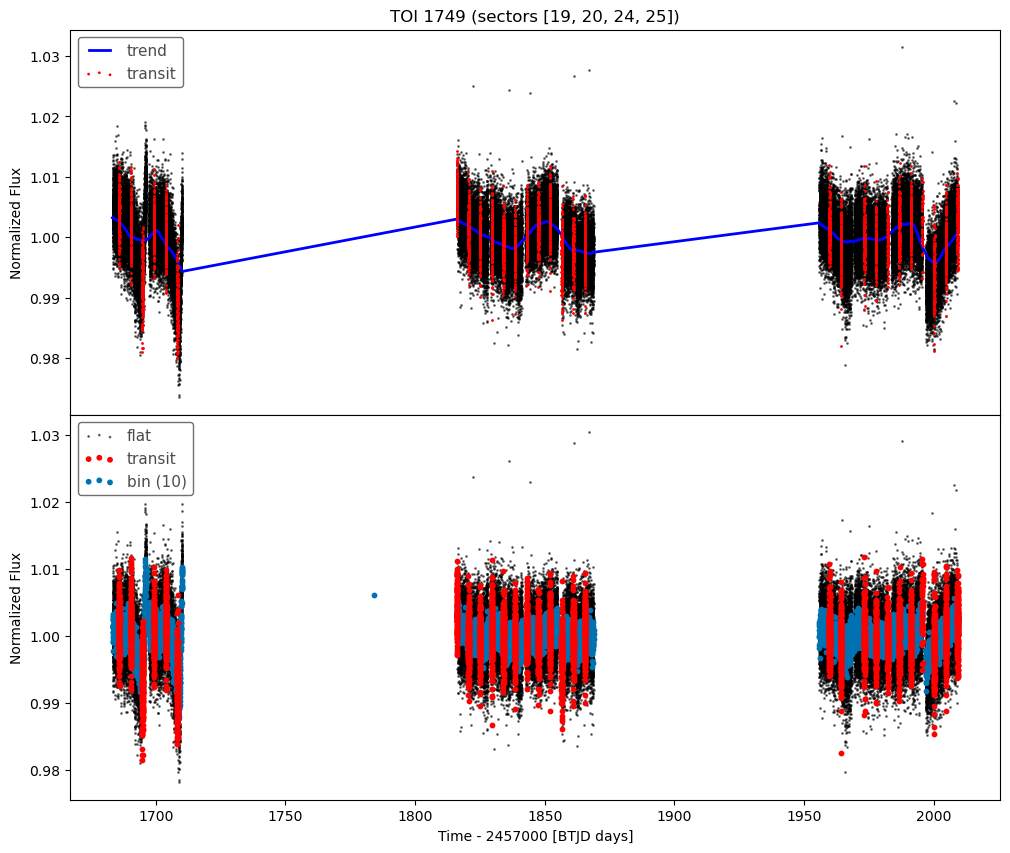

In [11]:
lc = sap.copy()

fig = s.plot_trend_flat_lcs(lc, window_length=11)
fig.axes[0].set_title(f"{s.target_name} (sectors {selected_sectors})")

## Using vanilla Lomb-Scargle

In [12]:
transit_mask = cr.get_transit_mask(lc,
                                   period=s.toi_period,
                                   epoch=s.toi_epoch,
                                   duration_hours=s.toi_duration
                                  )

Using Lomb-Scargle method
P=16.76+/-2.68 d


Text(0.5, 0.98, 'TOI 1749 (sector [19, 20, 24, 25])')

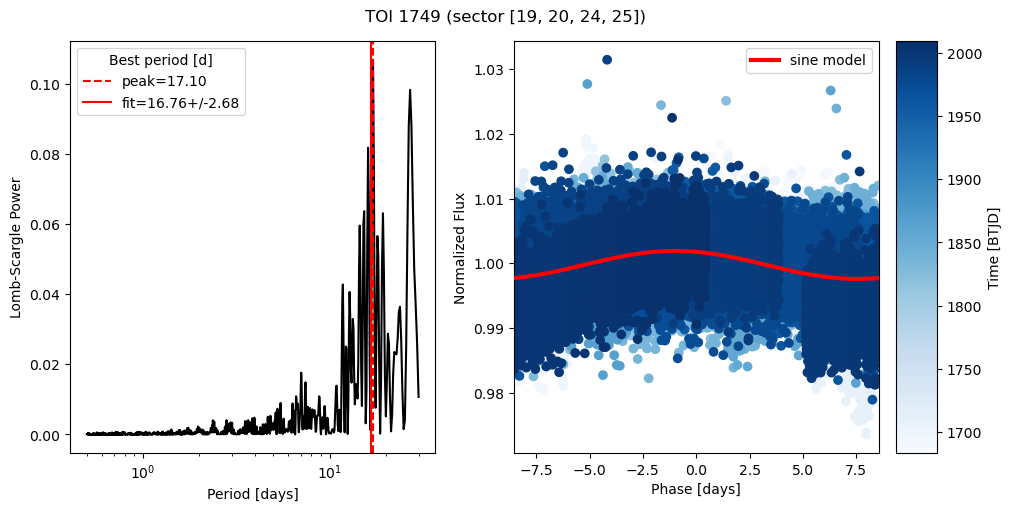

In [13]:
masked_lc = lc[~transit_mask]

fig = cr.plot_rotation_period(masked_lc.time, masked_lc.flux
                          )
fig.suptitle(f"TOI {s.toiid} (sector {selected_sectors})")

## Using Generalized Lomb-Scargle

In [14]:
data = [masked_lc.time, 
        masked_lc.flux, 
        masked_lc.flux_err]
gls = cr.Gls(data)

In [15]:
gls.best

{'f': 0.03037267259963528,
 'P': 32.92433343557683,
 'amp': 0.0022894214818289624,
 'ph': 0.11294336621661581,
 'T0': 1679.6357105350514,
 'offset': 0.9999755762340616,
 'e_amp': 2.110520846901706e-05,
 'e_ph': 0.0014671821154336232,
 'e_T0': 0.048305993179251584,
 'e_offset': 1.4923636026797716e-05,
 'e_f': 2.279992121039685e-05,
 'e_P': 0.024715382084782377}

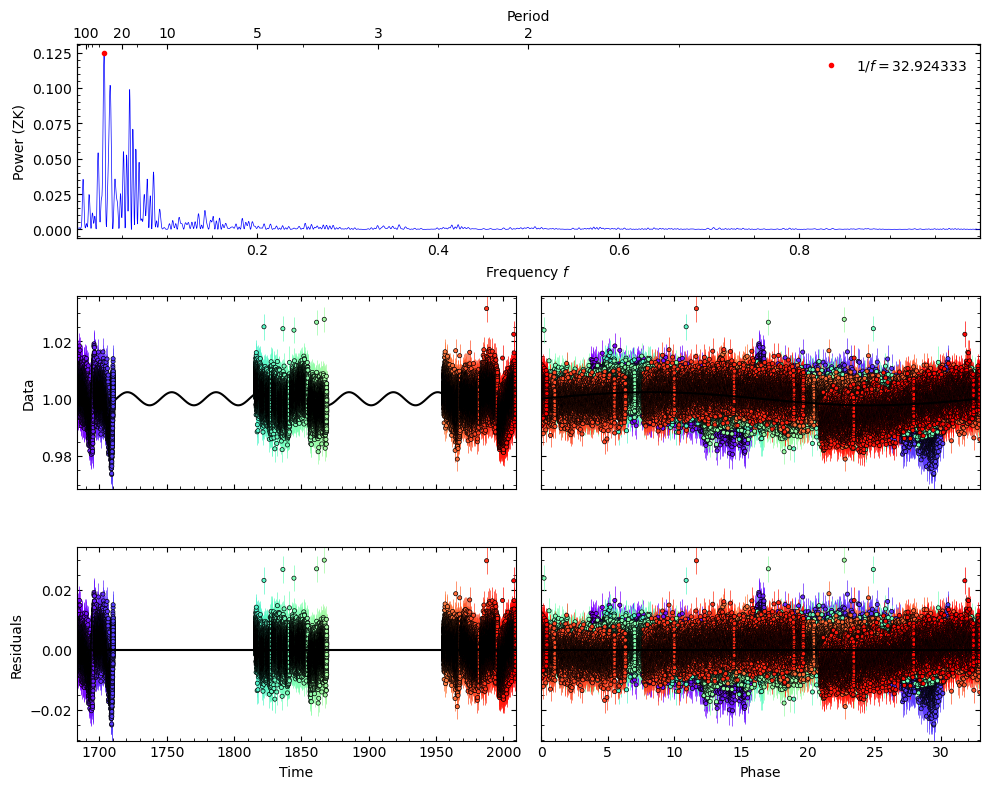

In [16]:
fig = gls.plot()